# Data Analysis and Visualization of Petrol/Gas Prices Worldwide
In this work, Petrol/Gas Prices Worldwide data will be analyzed according to limited information about the attirubutes. This work contain includes;

1. Describing of Data
1. Understanding the Data
1. Preparing of Data
1. Analysis and Visualization of the data with plotly library
1. Conclusion

## Lets start import the libraries that will use in this project.

* Pandas will be used the create a dataframe.
* Numpy will be used for the arithmetic calculations if it is necessary
* Plotly and geocoder libraries will be used for the visualization.
* Math and matplotlib also will be used in this analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sea
import math
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

!pip install pycountry_convert
!pip install plotly
!pip install plotly_express
!pip install geocoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.3/209.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 999.8 kB/s eta 0:00:00
/kaggle/input/petrolgas-prices-worldwide/Petrol Dataset June 23 2022 -- Version 2.csv
/kaggle/input/petrolgas-prices-worldwide/Petrol Dataset June 20 2022.csv


# 1. Describing the Data

In [2]:
# Data is reading helping with the Pandas libray in this stage.

df = pd.read_csv("../input/petrolgas-prices-worldwide/Petrol Dataset June 20 2022.csv",encoding='latin-1')

df = df.drop(["#"], axis = 1)
# To quick check of the data we can use the .head() function to see first 10 rows.

df.head()

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
0,United States,19687287,20.30%,934.3,5.19,1.37,289.97
1,China,12791553,13.20%,138.7,5.42,1.43,302.87
2,India,4443000,4.60%,51.4,5.05,1.33,281.93
3,Japan,4012877,4.10%,481.5,4.69,1.24,262.05
4,Russia,3631287,3.70%,383.2,3.41,0.90,190.56


# 2. Understanding the Data

Which columns will be used during the analysis?

1. Country
1. World Share
1. Yearly Gallons Per Capita
1. Price Per Gallon (USD)

In [3]:
# To check the datatypes of columns, as we can see, data has not any null-value.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          181 non-null    object 
 1   Daily Oil Consumption (Barrels)  181 non-null    int64  
 2   World Share                      181 non-null    object 
 3   Yearly Gallons Per Capita        181 non-null    float64
 4   Price Per Gallon (USD)           181 non-null    float64
 5   Price Per Liter (USD)            181 non-null    float64
 6   Price Per Liter (PKR)            181 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 10.0+ KB


In [4]:
# Before the start the analysis, we can check the all unique values of columns. It can be helped us to visualize data as much as easily.
df.nunique()
df["Country"].unique()

array(['United States', 'China', 'India', 'Japan', 'Russia',
       'Saudi Arabia', 'Brazil', 'South Korea', 'Canada', 'Germany',
       'Mexico', 'Iran', 'France', 'Indonesia', 'United Kingdom',
       'Singapore', 'Thailand', 'Italy', 'Spain', 'Australia', 'Turkey',
       'Taiwan', 'Netherlands', 'Egypt', 'Iraq', 'United Arab Emirates',
       'South Africa', 'Argentina', 'Malaysia', 'Belgium', 'Pakistan',
       'Poland', 'Venezuela', 'Vietnam', 'Nigeria', 'Philippines',
       'Colombia', 'Algeria', 'Chile', 'Hong Kong', 'Kuwait', 'Ukraine',
       'Morocco', 'Peru', 'Ecuador', 'Kazakhstan', 'Greece', 'Austria',
       'Sweden', 'Romania', 'Cuba', 'Hungary', 'Czech Republic (Czechia)',
       'Lebanon', 'Portugal', 'Turkmenistan', 'Switzerland', 'Denmark',
       'Israel', 'Ireland', 'Libya', 'New Zealand', 'Finland', 'Panama',
       'Norway', 'Oman', 'Qatar', 'Bangladesh', 'Myanmar', 'Kenya',
       'Sudan', 'Angola', 'Sri Lanka', 'Syria', 'Tunisia', 'Jordan',
       'Dominican 

In [5]:
# Statistical values of numerical columns can be check here. This way we can figure out the outliers according to statictical values.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Oil Consumption (Barrels),181.0,533573.049724,1.858067e+06,51.00,20036.00,61612.00,262352.00,19687287.00
Yearly Gallons Per Capita,181.0,332.006630,4.365587e+02,2.20,53.90,180.20,424.60,3679.50
Price Per Gallon (USD),181.0,5.695691,4.370484e+00,0.08,4.15,5.28,6.76,54.89
Price Per Liter (USD),181.0,1.505138,1.154575e+00,0.02,1.10,1.40,1.79,14.50
Price Per Liter (PKR),181.0,318.219227,2.441921e+02,4.65,232.02,295.04,377.74,3066.75


# 3. Preparing of Data

In [6]:
# Double check for the null-values
df.isnull().sum()

# As we can see, all variables have not null values. 

Country                            0
Daily Oil Consumption (Barrels)    0
World Share                        0
Yearly Gallons Per Capita          0
Price Per Gallon (USD)             0
Price Per Liter (USD)              0
Price Per Liter (PKR)              0
dtype: int64

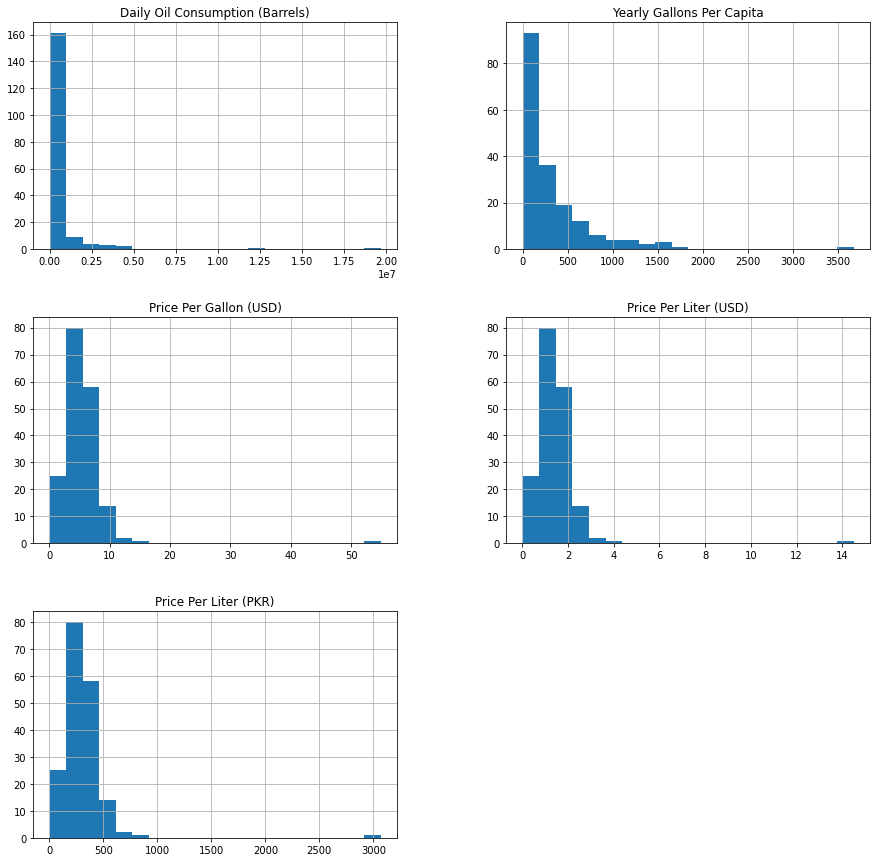

In [7]:
# Lets see the general distrubition of the numerical variables

axList = df.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

# 4. Analysis and Visualization of the Data

In [8]:
# Lets see top 10 country Daily Oil Consumption (Barrels)

df_daily = df.sort_values(by=['Daily Oil Consumption (Barrels)'], ascending=False)
df_daily = df_daily.head(10)

df_daily

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
0,United States,19687287,20.30%,934.3,5.19,1.37,289.97
1,China,12791553,13.20%,138.7,5.42,1.43,302.87
2,India,4443000,4.60%,51.4,5.05,1.33,281.93
3,Japan,4012877,4.10%,481.5,4.69,1.24,262.05
4,Russia,3631287,3.70%,383.2,3.41,0.90,190.56
5,Saudi Arabia,3302000,3.40%,1560.2,2.35,0.62,131.34
6,Brazil,2984000,3.10%,221.9,5.36,1.42,299.27
7,South Korea,2605440,2.70%,783.4,6.09,1.61,340.52
8,Canada,2486301,2.60%,1047.6,6.76,1.79,377.74
9,Germany,2383393,2.50%,444.5,7.65,2.02,427.44


In [9]:
# Lets see the top 10 countries where have the highest Daily Oil Consumption
fig = px.bar(df_daily, x='Country', y='Daily Oil Consumption (Barrels)')
fig.show()

In [10]:
# Also in this phase, we can see the Daily Oil Consumtion in Map Plot for each country.
countries = {}
import pycountry
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

    
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

df["Code"] = [countries.get(x, 'Unknown code') for x in df["Country"]]

fig = px.choropleth(df, locations="Code",
                    hover_name="Country",
                    hover_data=df.columns,
                    color="Daily Oil Consumption (Barrels)",
                    color_continuous_scale="Viridis",
                    range_color=(Average(df["Daily Oil Consumption (Barrels)"]), max(df["Daily Oil Consumption (Barrels)"])), 
                    projection="natural earth"
                   
                   )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Note: Some of country name did not change as CODE cause of that first definition of the country. Therefore, we can just see the countries that have country code on the map.

In [11]:
# When We are trying to sort the data according to "World Share" variable, code result gives wrong sorting of the data. 
# Because of that, we will transform the "World Share" column from string to float to use in analysis phase.


df_world_share = df["World Share"]
index = 0
df_world_share_transform = []
for each in df_world_share:

    x = float(df_world_share[index].replace("%", ''))
    x = float("{0:.5f}".format(x))
    df_world_share_transform.append(x)
    
    index += 1
type(df_world_share_transform)
df["World_Share"] = df_world_share_transform
df.drop(["World Share"],axis = 1)

df_world_share = df.sort_values(by=['World_Share'], ascending=False)
df_world_share = df_world_share.head(10)
df_world_share

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),Code,World_Share
0,United States,19687287,20.30%,934.3,5.19,1.37,289.97,USA,20.3
1,China,12791553,13.20%,138.7,5.42,1.43,302.87,CHN,13.2
2,India,4443000,4.60%,51.4,5.05,1.33,281.93,IND,4.6
3,Japan,4012877,4.10%,481.5,4.69,1.24,262.05,JPN,4.1
4,Russia,3631287,3.70%,383.2,3.41,0.90,190.56,Unknown code,3.7
5,Saudi Arabia,3302000,3.40%,1560.2,2.35,0.62,131.34,SAU,3.4
6,Brazil,2984000,3.10%,221.9,5.36,1.42,299.27,BRA,3.1
7,South Korea,2605440,2.70%,783.4,6.09,1.61,340.52,Unknown code,2.7
8,Canada,2486301,2.60%,1047.6,6.76,1.79,377.74,CAN,2.6
9,Germany,2383393,2.50%,444.5,7.65,2.02,427.44,DEU,2.5


In [12]:
# Top 10 countries World Share percentage can be seen in this pie chart
fig = px.pie(df_world_share, values='World_Share', names='Country')
fig.update_layout(
    title={
        'text': "World Share of Petrol/Gas",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()



In [13]:
# In this plot we can see the also distribution of the Price Per Liter (USD) of the top 10 countries where have the highest world share ratio.
fig = px.box(df_world_share, y="Price Per Liter (USD)",points="all")
fig.show()

In [14]:
# World Share distribution of the Petrol/Gas can be seen in this Map Plot
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

    
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

df["Code"] = [countries.get(x, 'Unknown code') for x in df["Country"]]

fig = px.choropleth(df, locations="Code",
                    hover_name="Country",
                    hover_data=df.columns,
                    color="World_Share",
                    color_continuous_scale="Viridis",
                    range_color=(Average(df["World_Share"]), max(df["World_Share"])), 
                    projection="natural earth"
                   
                   )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Note: Some of country name did not change as CODE cause of that first definition of the country. Therefore, we can just see the countries that have country code on the map.

In [15]:
# Lets see top 10 country Daily Oil Consumption (Barrels)

df_per_capita = df.sort_values(by=['Yearly Gallons Per Capita'], ascending=False)
df_per_capita = df_per_capita.head(10)

df_per_capita

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),Code,World_Share
15,Singapore,1357000,1.40%,3679.5,8.71,2.30,486.87,SGP,1.40
176,Saint Pierre & Miquelon,660,0.00%,1705.1,8.27,2.19,462.13,Unknown code,0.00
106,Malta,47000,0.05%,1652.2,5.28,1.40,295.04,MLT,0.05
5,Saudi Arabia,3302000,3.40%,1560.2,2.35,0.62,131.34,SAU,3.40
94,Luxembourg,56194,0.06%,1487.2,7.91,2.09,441.82,LUX,0.06
25,United Arab Emirates,896000,0.90%,1467.3,4.15,1.10,232.02,ARE,0.90
40,Kuwait,359000,0.40%,1390.9,1.29,0.34,72.33,KWT,0.40
178,Montserrat,400,0.00%,1231.1,4.57,1.21,255.07,MSR,0.00
154,Aruba,8000,0.01%,1169.4,6.08,1.61,339.67,ABW,0.01
155,Seychelles,7299,0.01%,1169.1,6.90,1.82,385.35,SYC,0.01


In [16]:
# Top 10 countries where have the highest Yearly Gallons Per Capita can be seen in this bar chart
fig = px.bar(df_per_capita, x='Country', y='Yearly Gallons Per Capita')
fig.show()

In [17]:
# Lets see top 10 country Price Per Liter (USD)

df_price_per_liter = df.sort_values(by=['Price Per Liter (USD)'], ascending=False)
df_price_per_liter = df_price_per_liter.head(10)

df_price_per_liter

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),Code,World_Share
139,North Korea,18000,0.02%,10.9,54.89,14.50,3066.75,Unknown code,0.02
175,Tonga,899,0.00%,136.3,16.20,4.28,905.22,TON,0.00
180,Niue,51,0.00%,484.4,11.43,3.02,638.73,NIU,0.00
39,Hong Kong,408491,0.40%,864.5,11.35,3.00,634.29,HKG,0.40
64,Norway,204090,0.20%,595.8,10.22,2.70,571.26,NOR,0.20
57,Denmark,158194,0.20%,424.6,10.04,2.65,561.11,DNK,0.20
62,Finland,210030,0.20%,585.7,10.01,2.64,559.21,FIN,0.20
138,Iceland,19090,0.02%,880.9,9.83,2.60,549.48,ISL,0.02
46,Greece,296101,0.30%,427.6,9.49,2.51,530.02,GRC,0.30
22,Netherlands,937098,1.00%,846.0,9.33,2.47,521.35,NLD,1.00


Text(0.5, 1.0, 'Daily Oil Consumption (Barrels)')

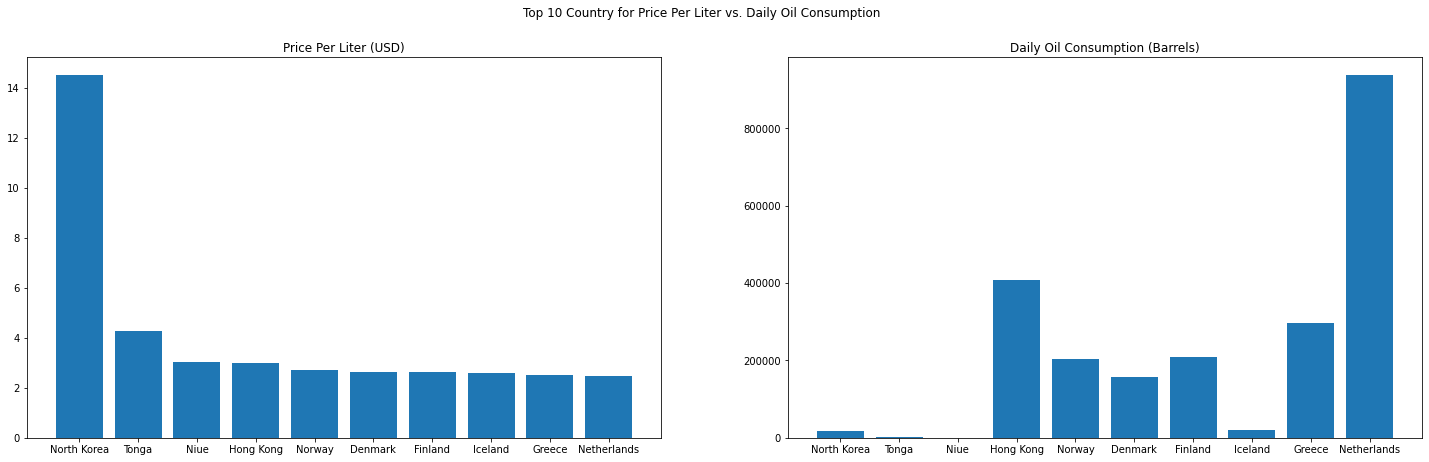

In [18]:
# In this part, I tried to compare of the top 10 country for Price per Liter (Top 10 countries) 
fig, (ax1, ax2) = fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))
fig.suptitle('Top 10 Country for Price Per Liter vs. Daily Oil Consumption')
ax1.bar(df_price_per_liter["Country"], df_price_per_liter["Price Per Liter (USD)"])
ax1.set_title('Price Per Liter (USD)')
ax2.bar(df_price_per_liter["Country"], df_price_per_liter["Daily Oil Consumption (Barrels)"])
ax2.set_title('Daily Oil Consumption (Barrels)')

# 5. Conclusion
In this work, Petrol/Gas Prices Worlwide in 2020 Data presents the total consumption, price per liter and world share ratio of the countries. This way I decided to analyze the general and valuable parts of the data. Data analysis shown that;

1. Which countries are the top 10 country for the Daily Oil Consumption in the world?
1. Which countries are the top 10 country for World Share ratio of the Petrol/Gas in the world?
1. Which countries are the top 10 country for Yearly Gallons Per Capita in the world and what are their Price per Liter for Petrol.

This work also can be found on the at the following github adress: https://github.com/KeskinHakan/petrol_gas_prices_worldwide